# Titanic: Machine Learning from Disaster (맛보기)
### Predict survival on the Titanic
- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing

## 1. Defining the problem statement
Complete the analysis of what sorts of people were likely to survive.  
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

In [ ]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

## 2. Collecting the data

training data set and testing data set are given by Kaggle
you can download from  
my github [https://github.com/minsuk-heo/kaggle-titanic/tree/master](https://github.com/minsuk-heo/kaggle-titanic)  
or you can download from kaggle directly [kaggle](https://www.kaggle.com/c/titanic/data)  

### load train, test dataset using Pandas

In [ ]:
!pwd

/content


##csv 파일 업로드 [1]
### test.csv [파일 다운](https://drive.google.com/file/d/10fWniWksXYDzHydEO7jLjpOxR-bezLTi/view?usp=sharing)
 
### train.csv  [파일 다운](https://drive.google.com/file/d/1QjKVqko1nVjB5cFz572tj3stsfZnnxjR/view?usp=sharing)


In [ ]:
#맛보기 1 파일읽어오기
import pandas as pd

#train = pd.read_csv('sample_data/input/train.csv')
#test = pd.read_csv('sample_data/input/test.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 3. Exploratory data analysis
Printing first 5 rows of the train dataset.

In [ ]:
train.head(80)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.00,0,0,348123,7.6500,F G73,S
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


### Data Dictionary
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- sibsp:	# of siblings / spouses aboard the Titanic  	
- parch:	# of parents / children aboard the Titanic  	
- ticket:	Ticket number	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

**Total rows and columns**

We can see that there are 891 rows and 12 columns in our training dataset.

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
test.shape

(418, 11)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We can see that *Age* value is missing for many rows. 

Out of 891 rows, the *Age* value is present only in 714 rows.

Similarly, *Cabin* values are also missing in many rows. Only 204 out of 891 rows have *Cabin* values.

In [ ]:
train.isnull().sum() #널의 개수

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum() #널의 개수

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are 177 rows with missing *Age*, 687 rows with missing *Cabin* and 2 rows with missing *Embarked* information.

### import python lib for visualization [2]

In [ ]:
#맛보기 2 :시각화 그래프에서 정보 도출
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

### Bar Chart for Categorical Features [3/4]
- Pclass
- Sex
- SibSp ( # of siblings and spouse)
- Parch ( # of parents and children)
- Embarked
- Cabin

In [ ]:
#맛보기 3
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

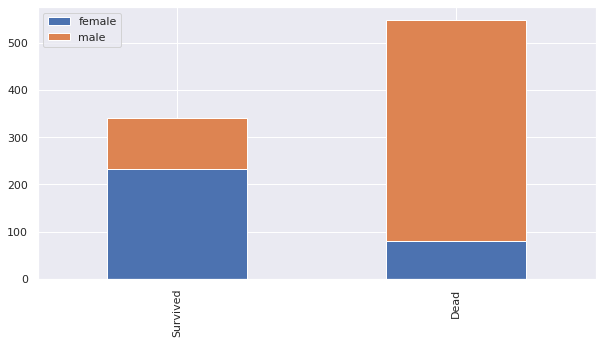

In [ ]:
#맛보기 4
bar_chart('Sex')

The Chart confirms **Women** more likely survivied than **Men**

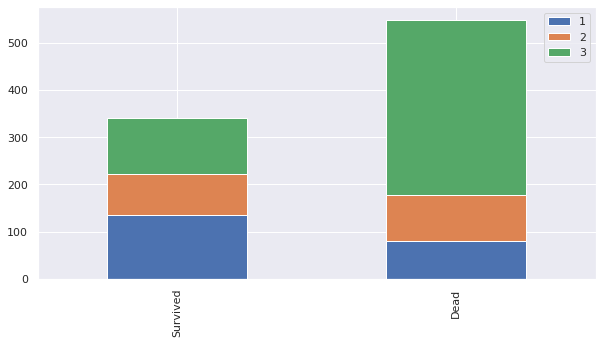

In [ ]:
bar_chart('Pclass')

The Chart confirms **1st class** more likely survivied than **other classes**  
The Chart confirms **3rd class** more likely dead than **other classes**

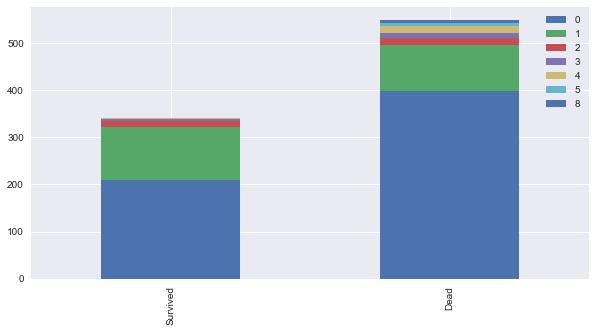

In [ ]:
bar_chart('SibSp') #동행인

The Chart confirms **a person aboarded with more than 2 siblings or spouse** more likely survived  
The Chart confirms ** a person aboarded without siblings or spouse** more likely dead

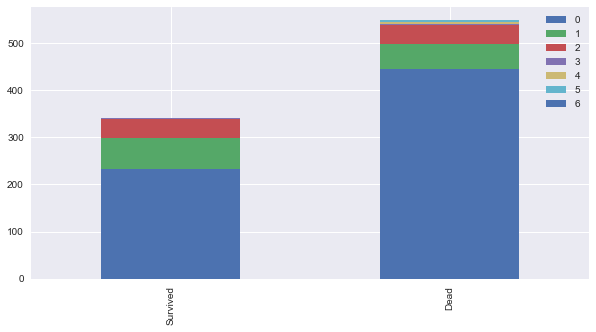

In [ ]:
bar_chart('Parch') # 부모와 아이들

The Chart confirms **a person aboarded with more than 2 parents or children** more likely survived  
The Chart confirms ** a person aboarded alone** more likely dead

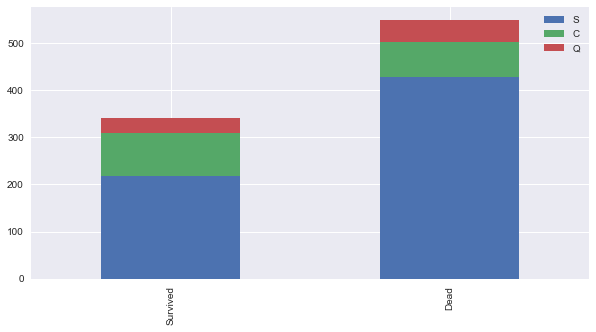

In [ ]:
bar_chart('Embarked') #선박 지역

The Chart confirms **a person aboarded from C** slightly more likely survived  
The Chart confirms **a person aboarded from Q** more likely dead  
The Chart confirms **a person aboarded from S** more likely dead

## 4. Feature engineering

Feature engineering is the process of using domain knowledge of the data  
to create features (**feature vectors**) that make machine learning algorithms work.  

feature vector is an n-dimensional vector of numerical features that represent some object.  
Many algorithms in machine learning require a numerical representation of objects,  
since such representations facilitate processing and statistical analysis.

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 4.1 how titanic sank?
sank from the bow of the ship where third class rooms located  
conclusion, Pclass is key feature for classifier

In [ ]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 4.2 Name
skip

### 4.3 Sex [5/6]

male: 0
female: 1

In [ ]:
#맛보기 5 : 2개 Dataframe 의 성 (sex) 값이 문자열인데 이 값을 수치값으로 변경
train_test_data = [train, test]    # combining train and test dataset
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


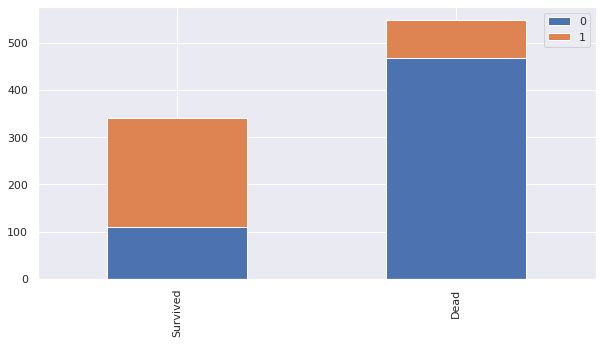

In [ ]:
#맛보기 6 - sex 과 생존여부 상관관계, sex 값 변경확인
bar_chart('Sex')
train.head()

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


### 4.4 Age 
skip

#### 4.4.1 some age is missing
Let's use Title's median age for missing Age

#### 4.4.2 Binning
Binning/Converting Numerical Age to Categorical Variable  

feature vector map:  
child: 0  
young: 1  
adult: 2  
mid-age: 3  
senior: 4

### 4.5 Embarked
skip

#### 4.5.1 filling missing values

more than 50% of 1st class are from S embark  
more than 50% of 2nd class are from S embark  
more than 50% of 3rd class are from S embark

**fill out missing embark with S embark**

### 4.6 Fare
skip

### 4.7 Cabin
skip

### 4.8 FamilySize
skip

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##필요없는 column (항목) 삭제, 훈련셋,검증셋 [7]

In [ ]:
#맛보기 7 : 불필요한 Feature 삭제
features_drop2=['Name','Age','Ticket','Fare','Cabin','Embarked','Ticket', 'SibSp', 'Parch']

train = train.drop(features_drop2, axis=1)
test = test.drop(features_drop2, axis=1) #최종 테스트를 위해 3개의 Feature 만 남김
train = train.drop(['PassengerId'], axis=1) #승객ID 삭제

train_data = train.drop('Survived', axis=1) #생존여부 삭제
target = train['Survived'] #target 변수 생성

#train 구조
train = 3개의 열을 가짐 : 생존, 등급, 성
train_data =등급, 성
target = 생존 여부

In [ ]:
train.shape, train_data.shape, target.shape, test.shape

((891, 3), (891, 2), (891,), (418, 3))

In [ ]:
train_data.head()
#target.head(10)

,Pclass,Sex
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0


In [ ]:
test.head()

,PassengerId,Pclass,Sex
0,892,3,0
1,893,3,1
2,894,2,0
3,895,3,0
4,896,3,1


## 5. Modelling [8]

In [ ]:
#맛보기 8:  라이브러리 구동리# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
dtypes: int64(2), object(1)
memory usage: 21.0+ KB


### 6.2 Cross Validation (K-fold)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score  #아래 필요한 라이브러리
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### 6.2.1 kNN

### 6.2.2 Decision Tree

### 6.2.3 Ramdom Forest

### 6.2.4 Naive Bayes

### 6.2.5 SVM [9] 알고리즘 검증

In [ ]:
#맛보기 9 : SVM 분류기를 이용하여 예측하기 10번 나누어서 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

clf = SVC() #분류를 위한 SVM 객체생성
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.7752809  0.76404494 0.75280899 0.79775281 0.78651685
 0.78651685 0.76404494 0.74157303 0.69662921]


In [ ]:
print(round(np.mean(score)*100,2))
test.head()

76.65


,PassengerId,Pclass,Sex
0,892,3,0
1,893,3,1
2,894,2,0
3,895,3,0
4,896,3,1


## 7. Testing [10] 학습모델 생성, 예측값

In [ ]:
#clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)
print(prediction)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [ ]:
#맛보기 10 : 결과파일 생성
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission2.csv', index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
submission = pd.read_csv('submission.csv')
submission.head()

FileNotFoundError: ignored